# Tarea # 4: Procesamiento de señales

Por:Juan Carlos Solarte

Audio: Poema "Relato de Sergio Stepansky" por Leon de Greiff

In [1]:
import numpy as np
import IPython.display as ip
import matplotlib.pyplot as plt
import scipy.io.wavfile as rd
from scipy.fftpack import fft,ifft,fftshift, fftfreq, rfft, irfft
from scipy.signal import spectrogram
from scipy import signal
import matplotlib.colors as colors

## Ej. 1

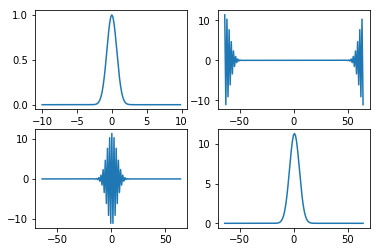

In [2]:
L = 20
n = 128
x2 = np.linspace(-L/2 , L/2, n+1)
x = x2[0:n]
frmodes = np.linspace(-n/2 , n/2, n)
u = np.exp(-x*x)
ut =fft(u)
utshift = fftshift(ut)


plt.subplot(221)
plt.plot(x,u)
plt.subplot(222)
plt.plot(frmodes,np.real(ut))
plt.subplot(223)
plt.plot(frmodes,np.real(utshift))
plt.subplot(224)
plt.plot(frmodes,abs(utshift))


plt.show()

## Ej. 2

<class 'numpy.ndarray'>


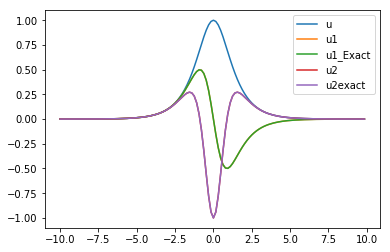

In [9]:
L = 20
n = 128
x2 = np.linspace(-L/2 , L/2, n+1)
x = x2[0:n]
dx = x[1] - x[0]
u = 1/np.cosh(x)
ut = fft(u)
k = np.append((2*np.pi/L)*np.arange(0,(n/2)),(2*np.pi/L)*np.arange((-n/2),0))
ut1 = 1j*k*ut
ut2 = -k*k*ut
u1 = np.real(ifft(ut1))
u2 = np.real(ifft(ut2))
u1exact = -1/np.cosh(x) * np.tanh(x)
u2exact = 1/np.cosh(x) -2*(1/np.cosh(x))**3

ux=[]
ux2=[]

print(type(u))

ux.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
for a in range(1,n-1):
    ux.append((u[a+1]-u[a-1])/(2*dx))

ux.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
for b in range(2,n-2):
    ux2.append((-u[b+2]+8*u[b+1]-8*u[b-1]+u[b-2])/(12*dx))

ux2.append((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.plot(x,u,x,u1,x,u1exact,x,u2,x,u2exact)
plt.legend(["u","u1","u1_Exact","u2","u2exact"])

plt.show()

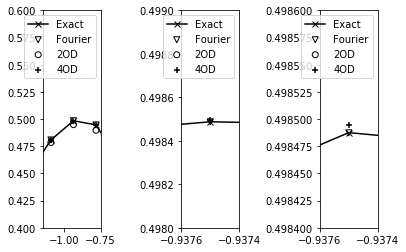

In [17]:
plt.subplot(1,5,1)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-1.15,-0.75,0.4,0.6])
plt.legend(["Exact","Fourier","2OD","4OD",])

plt.subplot(1,5,3)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-0.9376,-0.9374,0.498,0.499])
plt.legend(["Exact","Fourier","2OD","4OD",])


plt.subplot(1,5,5)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-0.9376,-0.9374,0.4984,0.4986])
plt.legend(["Exact","Fourier","2OD","4OD",])

plt.show()

## Ej. 4

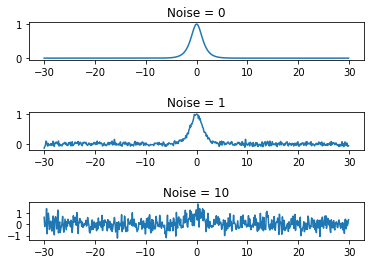

In [69]:
L = 30
n = 512
t2 = np.linspace(-L,L,n+1)
t = t2[0:n]
k = np.append((np.pi/L)*np.arange(0,(n/2)),(np.pi/L)*np.arange((-n/2),0))
u = 1/np.cosh(t)

noise = 1
ut = fft(u)
utn = ut +noise*(np.random.randn(n) + 1j*np.random.randn(n))
un = np.real(ifft(utn))

plt.subplot(5,1,1)
plt.plot(t,u)
plt.title("Noise = 0")

plt.subplot(5,1,3)
plt.plot(t,un)
plt.title("Noise = 1")


noise = 10
utn = ut +noise*(np.random.randn(n) + 1j*np.random.randn(n))
un = np.real(ifft(utn))


plt.subplot(5,1,5)
plt.plot(t,un)
plt.title("Noise = 10")

plt.show()


/home/jcsolarte10/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


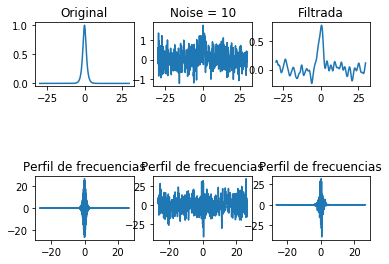

In [87]:
filtro = np.exp(-0.2*k**2)
unft= filtro * utn
unf = np.real(ifft(unft))


plt.subplot(3,3,1)
plt.plot(t,u)
plt.title("Original")

plt.subplot(3,3,2)
plt.plot(t,un)
plt.title("Noise = 10")

plt.subplot(3,3,3)
plt.plot(t,unf)
plt.title("Filtrada")

plt.subplot(3,3,7)
plt.plot(k,ut)
plt.title("Perfil de frecuencias")

plt.subplot(3,3,8)
plt.plot(k,utn)
plt.title("Perfil de frecuencias")

plt.subplot(3,3,9)
plt.plot(k,unft)
plt.title("Perfil de frecuencias")

plt.show()

## Ej. 5

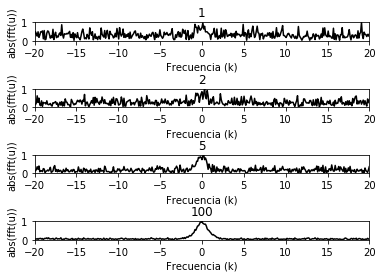

In [97]:
L = 30
n = 512
t2 = np.linspace(-L,L,n+1)
t = t2[0:n]
k = np.append((np.pi/L)*np.arange(0,(n/2)),(np.pi/L)*np.arange((-n/2),0))
ks = fftshift(k)
noise = 10

rep = [1,2,5,100]

for s in range(len(rep)):
    
    r = rep[s]
    u = 1/ np.cosh(t)
    ave = np.zeros(n)
    ut = fft(u)
    
    for l in range(r):
        utn = ut + noise*(np.random.randn(n) + 1j*np.random.randn(n))
        ave = ave + utn
    
    ave = abs(fftshift(ave))/r
    
    plt.subplot(10,1,3*s+1)
    plt.plot(ks,ave/max(ave),"k-")
    plt.axis([-20,20,0,1])
    plt.xlabel("Frecuencia (k)")
    plt.ylabel("abs(fft(u))")
    plt.title(str(r))
    
    
plt.show()

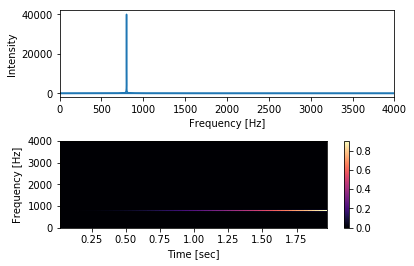

In [3]:
#Frequencia constante

omega = 800 # Hz
m = 8000
tf=2
t = np.arange(0,tf,1/m)
wv = (10/tf*t)*np.cos(2*np.pi*omega*t)

twv = fft(wv)
freq =fftfreq(len(t),d= 1/m)

plt.subplot(2,1,1)
plt.plot(freq,abs(twv))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Intensity')
plt.xlim(0,4000)

plt.subplot(2,1,2)
fq,t2,Sxx = spectrogram(wv,m)
plt.pcolormesh(t2, fq, Sxx, cmap = "magma")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

plt.subplots_adjust(hspace=0.5,wspace = 0.2)

plt.show()
ip.Audio(wv,rate=m)


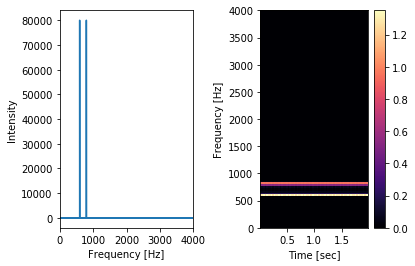

In [4]:
#Dos frequencias constantes
omega2 = 600
wv =(np.cos(2*np.pi*omega*t) + np.cos(2*np.pi*omega2*t))*10

twv = fft(wv)
freq =fftfreq(len(t),d= 1/m)

plt.subplot(1,2,1)
plt.plot(freq,abs(twv))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Intensity')
plt.xlim(0,4000)

plt.subplot(1,2,2)
fq,t2,Sxx = spectrogram(wv,m)
plt.pcolormesh(t2, fq, Sxx, cmap = "magma")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()


plt.subplots_adjust(wspace = 0.5)

plt.show()
ip.Audio(wv,rate=m)

## Procesamiento de Audio

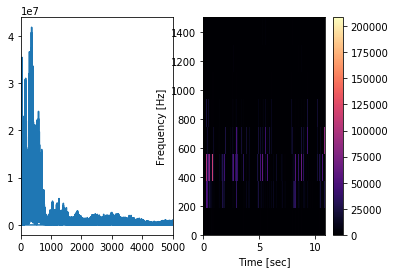

In [5]:
(f_m,b)=rd.read("./Con_ruido.wav")
b = np.array(b)
v = []
for i in range(len(b)):
    v.append(b[i][1])


v = np.array(v)
v.reshape(1,len(v))
v = v[:2**19]

t = np.arange(0,len(v)/f_m,1/f_m)


tv = fft(v)
freq =fftfreq(len(t),d= 1/f_m)

plt.subplot(1,2,1)
plt.plot(freq,abs(tv))
plt.xlim(0,5000)

plt.subplot(1,2,2)
fq,t2,Sxx = spectrogram(v,f_m)
plt.pcolormesh(t2, fq, Sxx, cmap = "magma")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,1500)
plt.colorbar()

plt.show()

plt.show()
ip.Audio(v,rate=f_m)

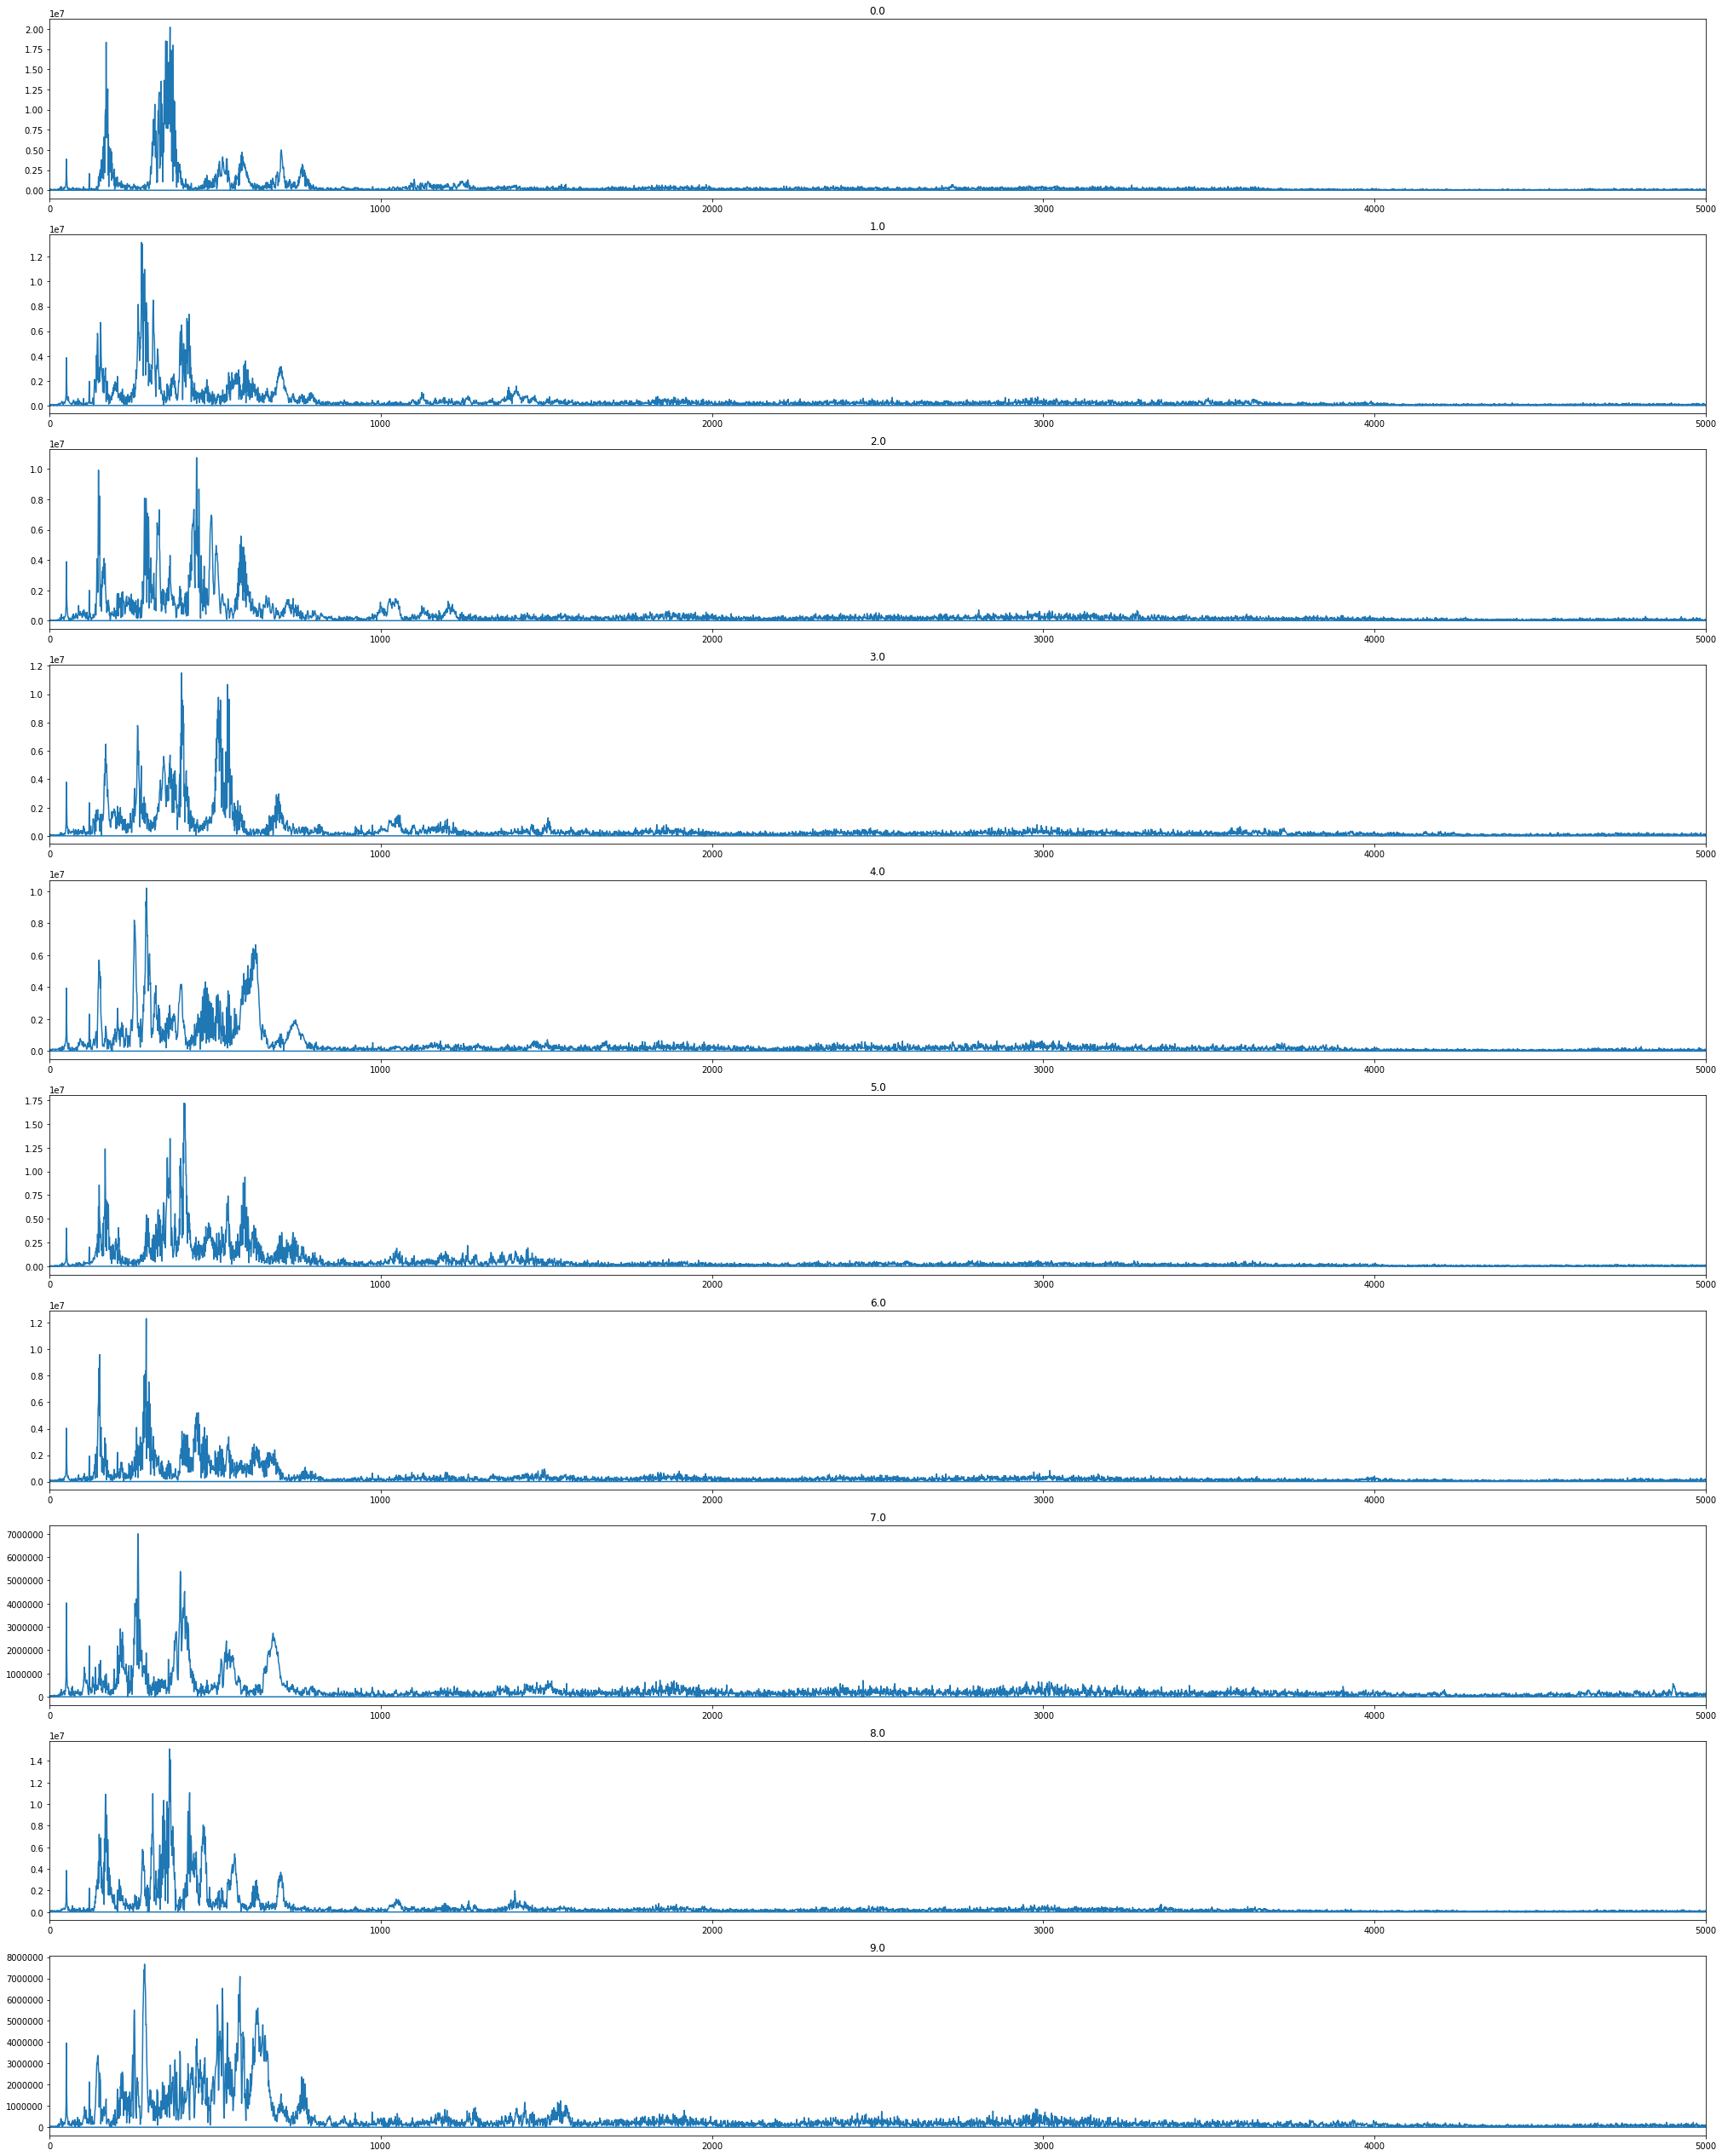

In [6]:
ts = np.arange(0,t[-1],1)
vnw = np.array([0])
for m in range(len(ts)-1):
    ti = ts[m]
    tf = ts[m+1]
    t1 = t[int(ti*f_m):int(tf*f_m)]
    v1 = v[int(ti*f_m):int(tf*f_m)]
    tv = fft(v1)
    freq = fftfreq(len(t1),d= 1/f_m)
    
    plt.subplot(len(ts),1,m+1)
    plt.title(str(ti))
    plt.plot(freq,abs(tv))
    plt.xlim(0,5000)
    
    vtemp = np.real(ifft(tv))
    nq = 0.5*f_m
    wn = [100/nq,1000/nq]
    b, a = signal.butter(5, wn, btype='bandpass')
    vf = signal.lfilter(b, a, vtemp)
    
    
    vnw=np.append(vnw,vf)


plt.subplots_adjust(left=0.5, bottom=0.5, right=5, top=10)
plt.show()
ip.Audio(vnw,rate=f_m)

In [259]:
f_m

48000

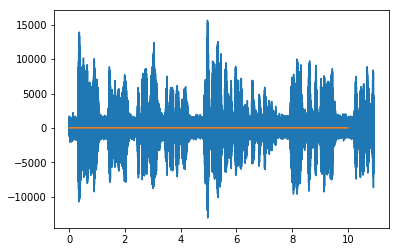

In [269]:
plt.plot(t[:len(v)],v,t[:len(vnw)],vnw)
plt.show()

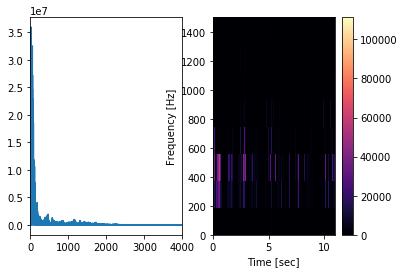

In [175]:
(f_m,b)=rd.read("./Sin_Ruido.wav")
b = np.array(b)
v = []
for i in range(len(b)):
    v.append(b[i][1])


v = np.array(v)
v.reshape(1,len(v))
v = v[:2**19]

t = np.arange(0,len(v)/f_m,1/f_m)

tv = fft(v)
freq =fftfreq(len(t),d= 1/m)

plt.subplot(1,2,1)
plt.plot(freq,abs(tv))
plt.xlim(0,4000)

plt.subplot(1,2,2)
fq,t2,Sxx = spectrogram(v,f_m)
plt.pcolormesh(t2, fq, Sxx, cmap = "magma")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,1500)
plt.colorbar()

plt.show()

plt.show()
ip.Audio(v,rate=f_m)